In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import missingno as msno


In [3]:
df = pd.read_csv('../data/sismos_japon.csv')

/home/hugo/programacion/dts/pf/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hugo/programacion/dts/pf/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hugo/programacion/dts/pf/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hugo/programacion/dts/pf/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hugo/programacion/dts/pf/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Gl

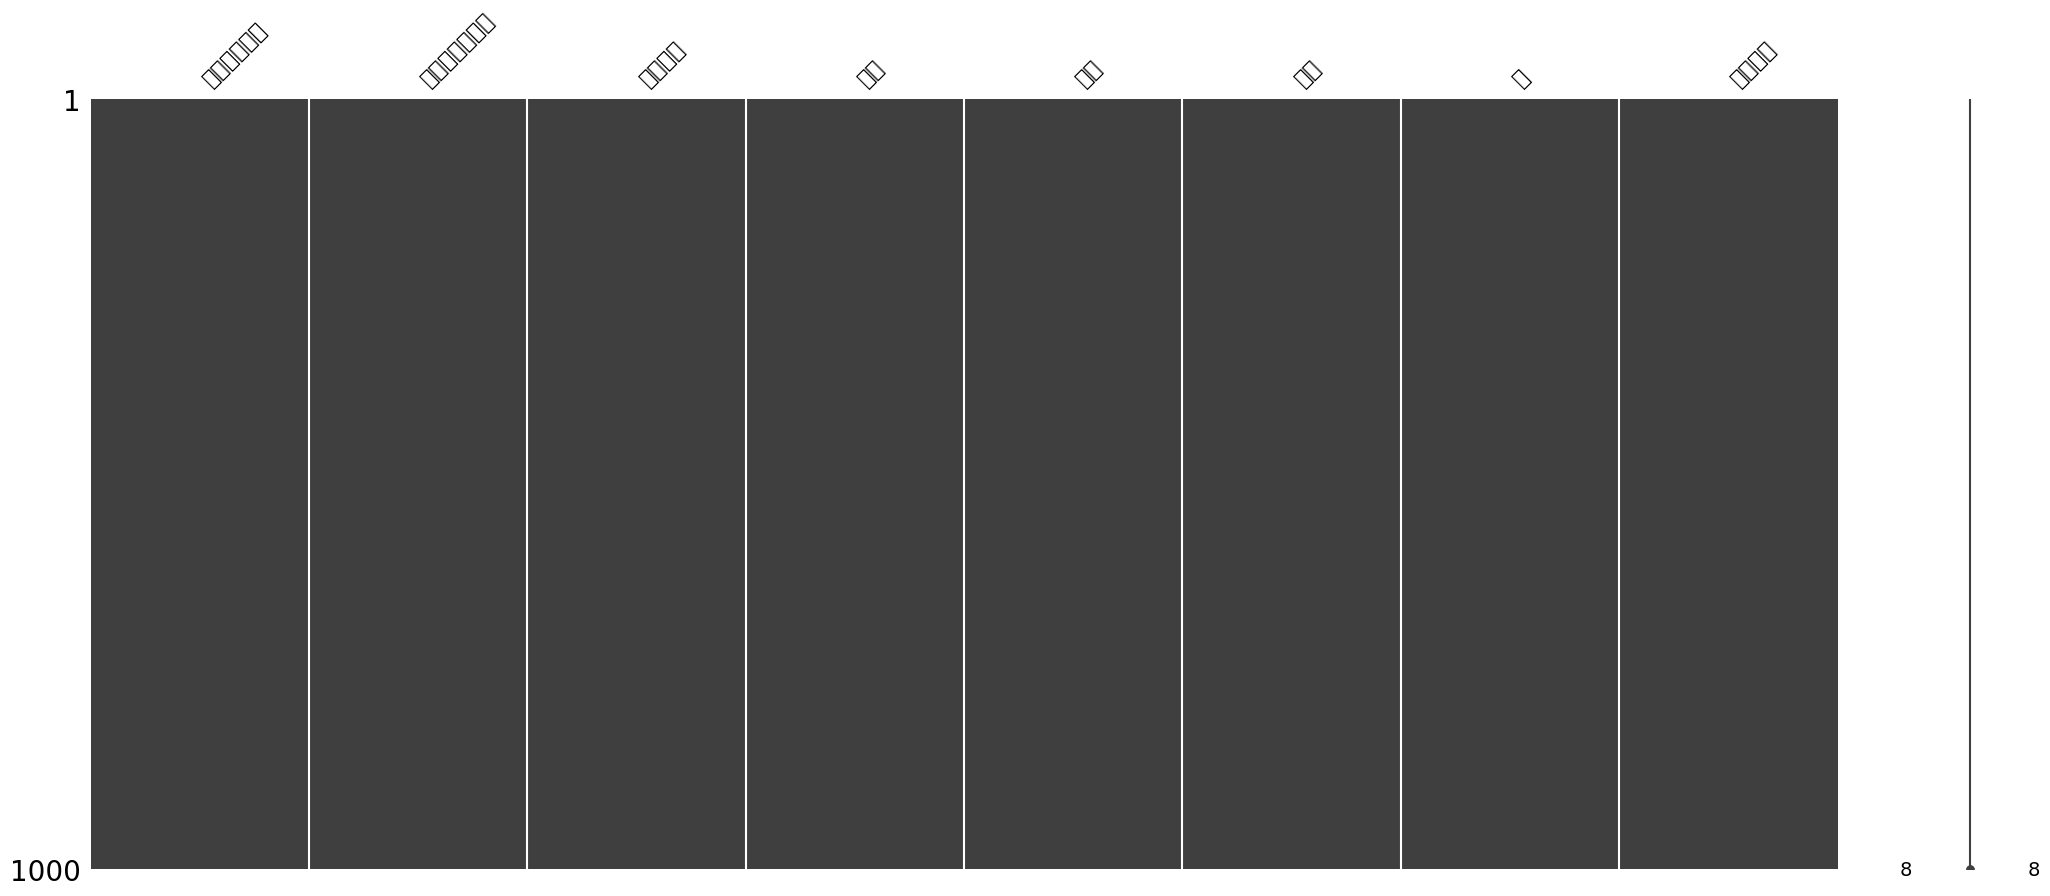

In [4]:
msno.matrix(df)

plt.show()

In [5]:
df = df.rename(columns={'地震の発生日': 'Fecha',
                        '地震の発生時刻': 'Hora ',
                        '震央地名': 'Epicentro',
                        '緯度': 'Latitud',
                        '経度': 'Longitud',
                        '深さ': 'Profundidad',
                        '最大震度': 'Máxima intensidad sísmica'})


In [6]:
df.head()

,Fecha,Hora,Epicentro,Latitud,Longitud,Profundidad,Ｍ,Máxima intensidad sísmica
0,2011/03/11,14:46:18.1,三陸沖,38°06.2′N,142°51.6′E,24 km,9.0,震度７
1,2013/05/24,14:44:48.9,オホーツク海,54°53.5′N,153°13.2′E,598 km,8.3,震度３
2,2007/01/13,13:23:13.0,千島列島東方,46°56.2′N,155°03.1′E,30 km,8.2,震度３
3,1994/10/04,22:22:56.9,北海道東方沖,43°22.5′N,147°40.4′E,28 km,8.2,震度６
4,2015/05/30,20:23:02.2,小笠原諸島西方沖,27°51.6′N,140°40.9′E,682 km,8.1,震度５強


In [7]:

df['Máxima intensidad sísmica'] = df['Máxima intensidad sísmica'].replace({'震度７': 'Intensidad sísmica 7',
                                        '震度３': 'Intensidad sísmica 3',
                                        '震度６': 'Intensidad sísmica 6',
                                        '震度５強': 'Intensidad sísmica 5 fuerte',
                                        '震度４': 'Intensidad sísmica 4',
                                        '震度６弱': 'Intensidad sísmica 6 débil',
                                        '震度２': 'Intensidad sísmica 2',
                                        '震度５': 'Intensidad sísmica 5',
                                        '震度１': 'Intensidad sísmica 1',
                                        '震度６強': 'Intensidad sísmica 6 fuerte',
                                        '震度５弱': 'Intensidad sísmica 5 débil',})


In [8]:
df.head()

,Fecha,Hora,Epicentro,Latitud,Longitud,Profundidad,Ｍ,Máxima intensidad sísmica
0,2011/03/11,14:46:18.1,三陸沖,38°06.2′N,142°51.6′E,24 km,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,オホーツク海,54°53.5′N,153°13.2′E,598 km,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,千島列島東方,46°56.2′N,155°03.1′E,30 km,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,北海道東方沖,43°22.5′N,147°40.4′E,28 km,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,小笠原諸島西方沖,27°51.6′N,140°40.9′E,682 km,8.1,Intensidad sísmica 5 fuerte


In [9]:
traducciones = {
    '三陸沖': 'Fuera de Sanriku',
'オホーツク海': 'Mar de Ojotsk',
'千島列島東方': 'Este de las islas Kuriles',
'北海道東方沖': 'Este de Hokkaido',
'小笠原諸島西方沖': 'Oeste de las islas Ogasawara',
'択捉島南東沖': 'Sureste de la isla Etorofu',
'十勝沖': 'Fuera de Tokachi',
'硫黄島近海': 'Frente a la costa de Iwo Jima',
'青森県東方沖': 'Frente al este de la prefectura de Aomori',
'父島近海': 'Frente a la costa de Chichijima',
'マリアナ諸島': 'Islas Marianas',
'北海道南西沖': 'Frente a la costa suroeste de Hokkaido',
'台湾付近': 'Cerca de Taiwán',
'石垣島南方沖': 'Frente al sur de Isla Ishigaki',
'秋田県沖': 'Afuera de la prefectura de Akita',
'茨城県沖': 'Afuera de la prefectura de Ibaraki',
'鳥島近海': 'Mar cerca de Torishima',
'北西太平洋': 'Océano Pacífico noroccidental',
'釧路沖': 'Afuera de Kushiro',
'中国東北部': 'Noreste de China',
'日向灘': 'Hyuganada',
'新潟県下越沖': 'Afuera de la prefectura de Shimoetsu Niigata',
'福島県沖': 'Afuera de la prefectura de Fukushima',
'岩手県沖': 'Afuera de la prefectura de Iwate',
'三重県南東沖': 'Sureste de la prefectura de Mie',
'サハリン南部付近': 'Cerca del sur de Sakhalin',
'宮城県沖': 'Afuera de la prefectura de Miyagi',
'根室半島南東沖': 'Afuera del sureste de la península de Nemuro',
'インドネシア付近': 'Cerca de Indonesia',
'熊本県熊本地方': 'Región de Kumamoto de la prefectura de Kumamoto',
'オホーツク海南部': 'Mar del Sur de Okhotsk',
'与那国島近海': 'Mar cerca de la isla de Yonaguni',
'鳥取県西部': 'Prefectura de Tottori occidental',
'大阪湾': 'Bahía de Osaka',
'日本海北部': 'Mar del Norte de Japón',
'日本海西部': 'Mar de Japón Occidental',
'ウラジオストク付近': 'Cerca de Vladivostok',
'カムチャツカ半島付近': 'Cerca de la península de Kamchatka',
'沖縄本島近海': 'Mar cerca de la isla principal de Okinawa',
'岩手県内陸南部': 'Zona interior sur de la prefectura de Iwate',
'千島列島': 'Islas Killil',
'択捉島付近': 'Cerca de la isla de Etorofu',
'東海道南方沖': 'Al sur de Tokaido frente a la costa',
'八丈島東方沖': 'Al este de la isla de Hachijo',
'薩摩半島西方沖': 'Al oeste de la península de Satsuma',
'青森県西方沖': 'Al oeste de la prefectura de Aomori',
'浦河沖': 'A la altura de Urakawa',
'沖縄本島北西沖': 'Noroeste de la isla principal de Okinawa',
'福島県浜通り': 'Hamadori en la prefectura de Fukushima',
'福岡県北西沖': 'Noroeste de la prefectura de Fukuoka',
'石垣島近海': 'Mar cerca de la isla de Ishigaki',
'伊豆大島近海': 'Mar cerca de Izu Oshima',
'石川県加賀地方': 'Región de Kaga en la prefectura de Ishikawa',
'能登半島沖': 'Afuera de la península de Noto',
'奄美大島近海': 'Afuera de la costa de Amami Oshima',
'駿河湾': 'Bahía de Suruga',
'サハリン西方沖': 'Al oeste de Sakhalin',
'若狭湾': 'Bahía de Wakasa',
'奄美大島北東沖': 'Noreste de Amami Oshima',
'岩手県沿岸北部': 'Costa norte de la prefectura de Iwate',
'新潟県上中越沖': 'Fuera de Jochuetsu, Prefectura de Niigata',
'関東東方沖': 'Este de Kanto',
'新潟県中越地方': 'Chuetsu, Prefectura de Niigata',
'長野県南部': 'Prefectura de Nagano Sur',
'国後島付近': 'Cerca de la isla Kunashiri',
'朝鮮半島北部': 'Península de Corea del Norte',
'山形県沖': 'Fuera de la Prefectura de Yamagata',
'胆振地方中東部': 'Iburi de Oriente Medio',
'長野県北部': 'Prefectura del norte de Nagano',
'京都府沖': 'Prefectura de Kioto',
'宮古島北西沖': 'Marina del noroeste de la isla de Miyako',
'安芸灘': 'Akinada',
'千葉県東方沖': 'Marina del este de la prefectura de Chiba',
'伊豆半島東方沖': 'Marina del este de la península de Izu',
'十勝地方南部': 'Southern Tokachi',
'中国北東部': 'Northeast China',
'宗谷東方沖': 'Eastern off Soya',
'鳥取県中部': 'Central Tottori',
'フィリピン付近': 'Cerca de Filipinas',
'種子島近海': 'Tanegashima',
'山口県中部': 'Central Yamaguchi',
'鹿児島県薩摩地方': 'Región de Satsuma, prefectura de Kagoshima',
'日本海中部': 'Mar de Japón Central',
'大分県北部': 'Parte norte de la prefectura de Oita',
'本州南方沖': 'Sur de Honshu',
'奄美大島北西沖': 'Noroeste de Amami Oshima',
'千島列島南東沖': 'Sureste de las Islas Kuriles',
'岐阜県美濃中西部': 'Medio oeste de Mino, Prefectura de Gifu',
'豊後水道': 'Canal Bungo',
'種子島南東沖': 'Sureste frente a Tanegashima',
'宮古島近海': 'Isla Miyako',
'石垣島北西沖': 'Noroeste frente a la isla Ishigaki',
'小笠原諸島東方沖': 'Este frente a las islas Ogasawara',
'三宅島近海': 'Mar cerca de Miyakejima',
'新島・神津島近海': 'Mar cerca de Niijima y Kozushima',
'釧路地方北部': 'Región del norte de Kushiro',
'宮城県北部': 'Prefectura del norte de Miyagi',
'サハリン近海': 'Mar cerca de Sakhalin',
'福島県中通り': 'Nakadori en la prefectura de Fukushima',
'静岡県東部': 'Prefectura oriental de Shizuoka',
'南大東島近海': 'Mar cerca de la isla Minami Daito',
'宮城県中部': 'Prefectura central de Miyagi',
'千葉県南東沖': 'Prefectura costera sudoriental de Chiba',
'秋田県内陸北部': 'Prefectura norteña de Akita',
'大分県西部': 'Prefectura occidental de Oita',
'京都府南部': 'Prefectura meridional de Kioto',
'和歌山県南方沖': 'Al sur de la prefectura de Wakayama',
'茨城県北部': 'Prefectura del norte de Ibaraki',
'淡路島付近': 'Cerca de la isla de Awaji',
'栃木県北部': 'Prefectura del norte de Tochigi',
'上川地方中部': 'Distrito central de Kamikawa',
'釧路地方中南部': 'Distrito central y sur de Kushiro',
'苫小牧沖': 'Afuera de Tomakomai',
'北海道北西沖': 'Noroeste de la costa de Hokkaido',
'伊予灘': 'Iyonada',
'石川県西方沖': 'Oeste de la costa de la prefectura de Ishikawa',
'岩手県内陸北部': 'Área interior del norte de la prefectura de Iwate',
'沖縄本島南方沖': 'Marina del sur de la isla principal de Okinawa',
'秋田県内陸南部': 'Área interior del sur de la prefectura de Akita',
'トカラ列島近海': 'Cerca de las islas Tokara',
'大阪府北部': 'Prefectura del norte de Osaka',
'島根県西部': 'Prefectura del oeste de Shimane',
'千葉県北東部': 'Prefectura del noreste de Chiba',
'留萌地方南部': 'Distrito del sur de Rumoi',
'根室地方北部': 'Distrito del norte de Nemuro',
'渡島地方東部': 'Prefectura del este de Oshima',
'福井県嶺南': 'Prefectura de Reinan Fukui',
'上川地方南部': 'Prefectura del sur de Kamikawa',
'島根県東部': 'Prefectura del este de Shimane',
'熊本県阿蘇地方': 'Distrito de Aso de la prefectura de Kumamoto',
'遠州灘': 'Enshunada',
'埼玉県北部': 'Prefectura del norte de Saitama',
'宮崎県南部山沿い': 'Prefectura del sur de Miyazaki',
'静岡県中部': 'Prefectura central de Shizuoka',
'大隅半島東方沖': 'Este frente a la península de Osumi',
'北海道西方沖': 'Oeste frente a Hokkaido',
'千葉県北西部': 'Noroeste de Chiba',
'周防灘': 'Suonada'

}

In [10]:
df['Epicentro'].replace(traducciones, inplace=True)

In [11]:
def int_lat_long(coord):
    int_coord, min_sec = coord.split('°')
    mins, secs = min_sec.split('.')
    secs = secs.replace('′N', '')
    secs = int(secs.replace('′E', ''))/600

    int_coord = int(int_coord)
    mins = int(mins)/60

    return int_coord + mins + secs

In [12]:
df['Latitud'] = df['Latitud'].apply(int_lat_long).astype(float)
df['Longitud'] = df['Longitud'].apply(int_lat_long).astype(float)

In [13]:
df.head(35)

,Fecha,Hora,Epicentro,Latitud,Longitud,Profundidad,Ｍ,Máxima intensidad sísmica
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24 km,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598 km,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30 km,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28 km,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682 km,8.1,Intensidad sísmica 5 fuerte
5,1963/10/13,14:17:50.5,Sureste de la isla Etorofu,44.048333,149.825000,0 km,8.1,Intensidad sísmica 4
6,2003/09/26,04:50:07.4,Fuera de Tokachi,41.778333,144.078333,45 km,8.0,Intensidad sísmica 6 débil
7,2006/11/15,20:14:09.6,Este de las islas Kuriles,46.701667,154.046667,30 km,7.9,Intensidad sísmica 2
8,2000/03/28,20:00:23.4,Frente a la costa de Iwo Jima,22.556667,144.035000,128 km,7.9,Intensidad sísmica 3
9,1968/05/16,09:48:54.5,Frente al este de la prefectura de Aomori,40.698333,143.595000,0 km,7.9,Intensidad sísmica 5


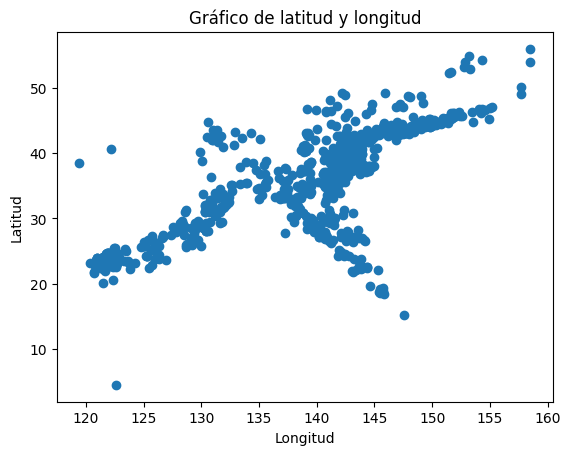

In [14]:
latitudes = df['Latitud']
longitudes = df['Longitud']

plt.scatter(longitudes, latitudes)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfico de latitud y longitud')
plt.show()

In [15]:
df

,Fecha,Hora,Epicentro,Latitud,Longitud,Profundidad,Ｍ,Máxima intensidad sísmica
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24 km,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598 km,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30 km,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28 km,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682 km,8.1,Intensidad sísmica 5 fuerte
...,...,...,...,...,...,...,...,...
995,1989/08/22,08:12:38.3,Cerca de Taiwán,24.353333,122.203333,55 km,6.0,Intensidad sísmica 2
996,1989/03/06,23:39:44.3,Marina del este de la prefectura de Chiba,35.696667,140.710000,56 km,6.0,Intensidad sísmica 5
997,1989/03/01,11:42:01.4,Sureste de la isla Etorofu,44.168333,149.013333,10 km,6.0,Intensidad sísmica 1
998,1989/01/23,07:20:17.8,Fuera de Tokachi,41.753333,144.516667,64 km,6.0,Intensidad sísmica 3


In [16]:
mapa = folium.Map(location=[35.6895, 139.6917], zoom_start=5)  # Coordenadas aproximadas del centro de Japón

# Iterar sobre los registros del DataFrame y agregar marcadores al mapa
for index, row in df.iterrows():
    latitud = row['Latitud']
    longitud = row['Longitud']
    epicentro = row['Epicentro']

    # Obtener la traducción del epicentro si está disponible, de lo contrario, usar el nombre original
    nombre_epicentro = traducciones.get(epicentro, epicentro)

    marcador = folium.Marker(location=[latitud, longitud], popup=nombre_epicentro)
    marcador.add_to(mapa)

# Mostrar el mapa
# mapa